In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
import os
os.chdir('/home/jaentrouble/adipose_train2')
print(os.getcwd())

/home/jaentrouble/adipose_train2


In [3]:
!git pull
%autoreload

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (3/3), 6.22 KiB | 3.11 MiB/s, done.
From https://github.com/jaentrouble/Adipos_tf_train2
   9a31cd0..0f1d67f  master     -> origin/master
Updating 9a31cd0..0f1d67f
Fast-forward
 train_model.ipynb | 768 +++++++++++++++++++++++++++++++++++++++++++++++++++---
 1 file changed, 728 insertions(+), 40 deletions(-)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with np.load('cell_mask_data.npz') as data:
    X = data['img']
    Y = data['mask']
print('X shape: ', X.shape, X.dtype)
print('Y shape: ', Y.shape, Y.dtype)

X shape:  (1533, 200, 200, 3) uint8
Y shape:  (1533, 200, 200) float32


In [6]:
X_test = X[1350:]
Y_test = Y[1350:]
X_train_small = X[:100]
Y_train_small = Y[:100]

In [7]:
import tensorflow as tf
from model_trainer import get_model
from adipose_models import *

In [8]:
model_f = conv4_b2_0
savedfile_name = 'conv4_b2_0'
target_epoch = 10

In [9]:
test_model = get_model(conv4_b2_0)
test_model.load_weights('savedmodels/'+savedfile_name+'/'+str(target_epoch))

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 200, 32)     

In [11]:
test_model.evaluate(X_train_small, Y_train_small)
test_model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 31ms/step - loss: 0.6990 - binary_accuracy: 0.6597


[0.6989772915840149, 0.6596824526786804]

In [12]:
predict = test_model(X_train_small)
print(predict.shape)

(100, 200, 200)


In [13]:
import random

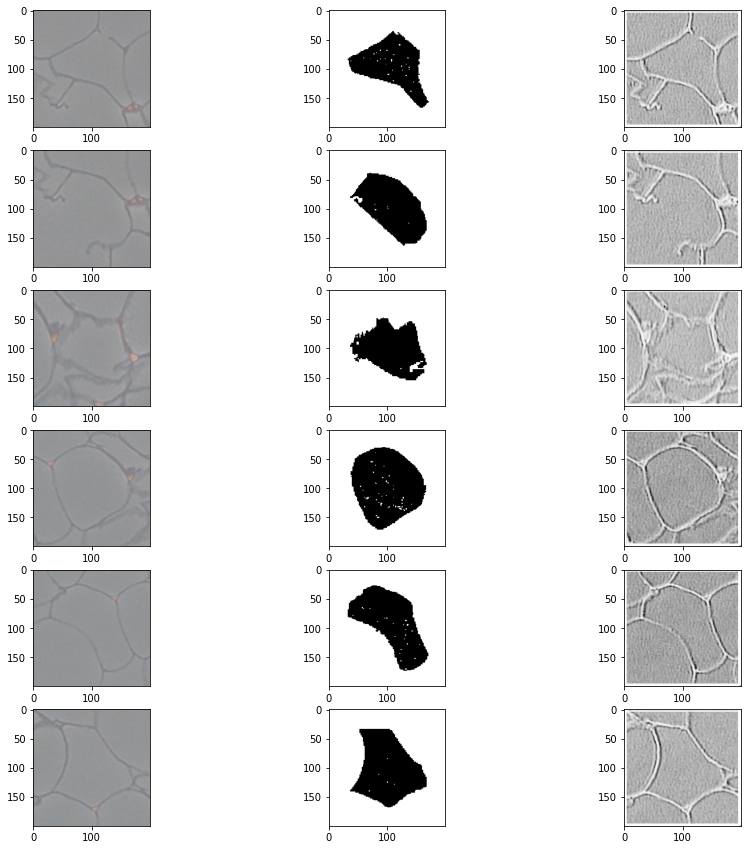

In [20]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
# r = random.randrange(0,predict.shape[0]-n)
r = 0
for img, mask, pred in zip(X_train_small[r:r+n], Y_train_small[r:r+n], predict[r:r+n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [18]:
print(1-np.sum(Y[3]/(200*200)))

0.6848250329494476
